In [1]:
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Deep learning packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Machine learning packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [3]:
train_data = pd.read_csv("train.txt", header = None, sep = ';', names = ['Comment','Emotion'], encoding = 'utf-8')
train_data['length']= [len(x) for x in train_data['Comment']]
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [4]:
train_data.shape

(16000, 3)

In [5]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [6]:
train_data.duplicated().sum()

np.int64(1)

In [7]:
train_data.drop_duplicates(inplace=True)

In [8]:
train_data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

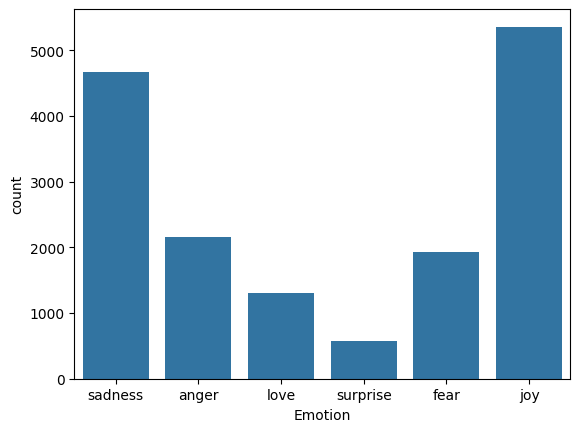

In [9]:
sns.countplot(x= train_data['Emotion'])
plt.show()

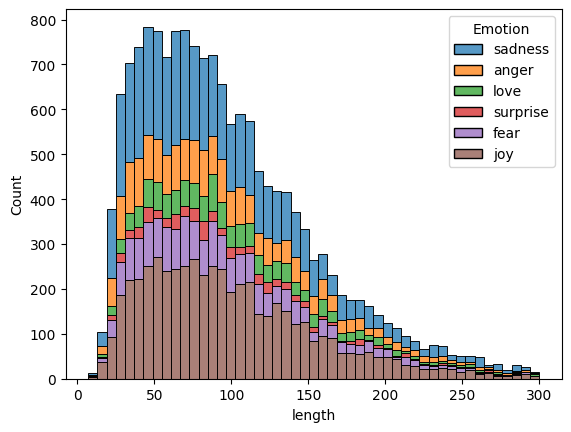

In [10]:
#data distribution
df2 = train_data.copy()

#converting the 'length' column into numpy array
length_values = df2['length'].values
#use sns.histplot instead of sns.kdeplot for doing simply

sns.histplot(data = df2,x = 'length',hue = 'Emotion', multiple = 'stack')
plt.show()


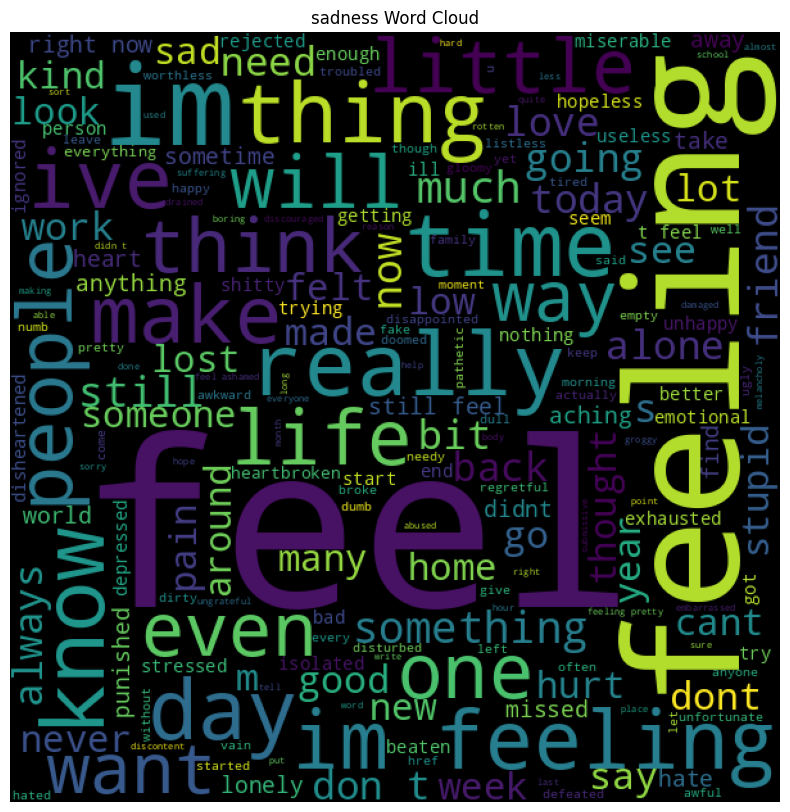

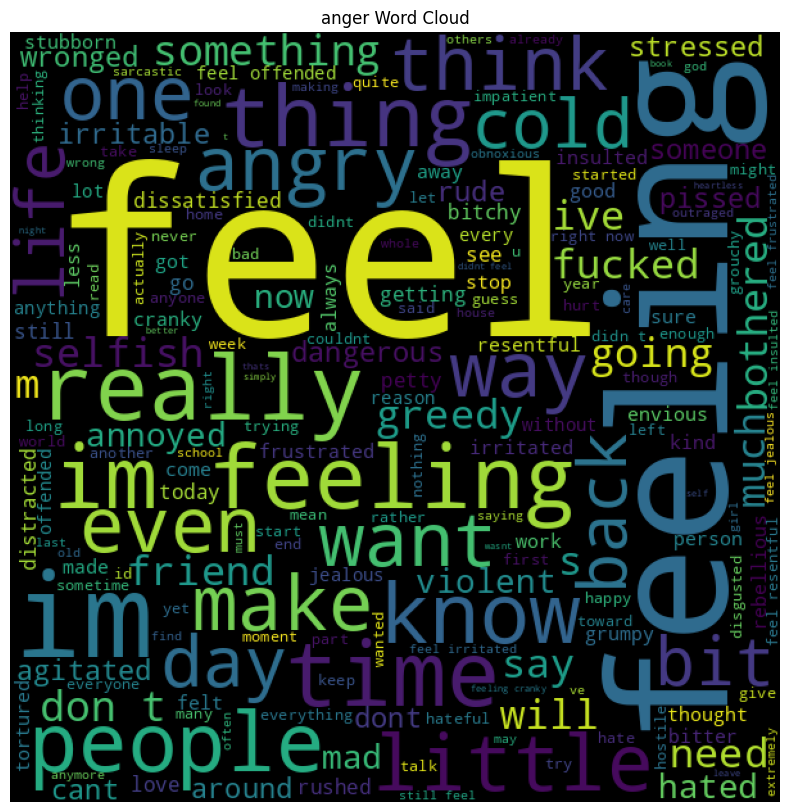

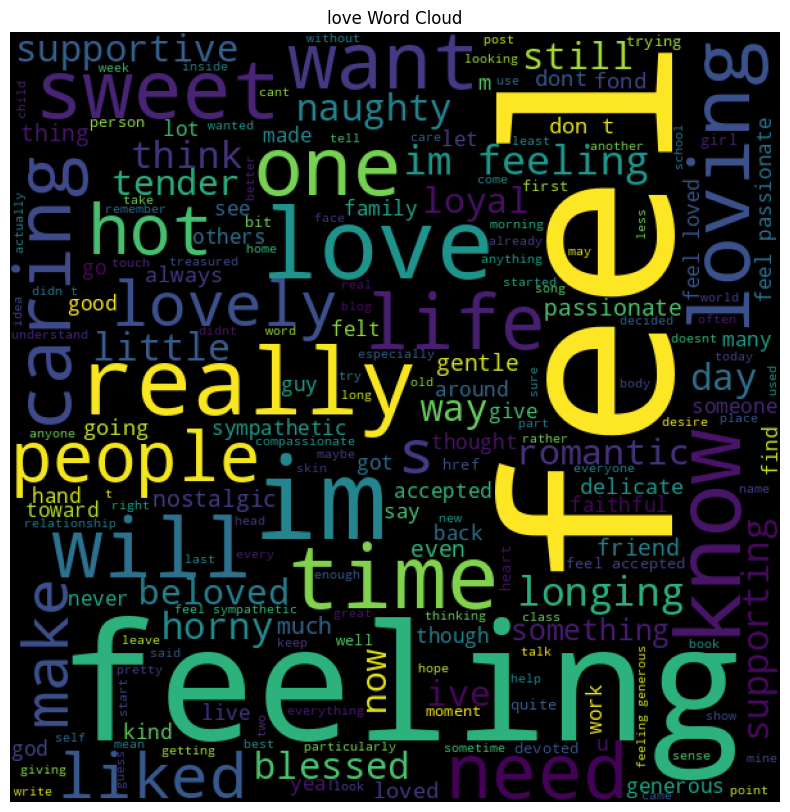

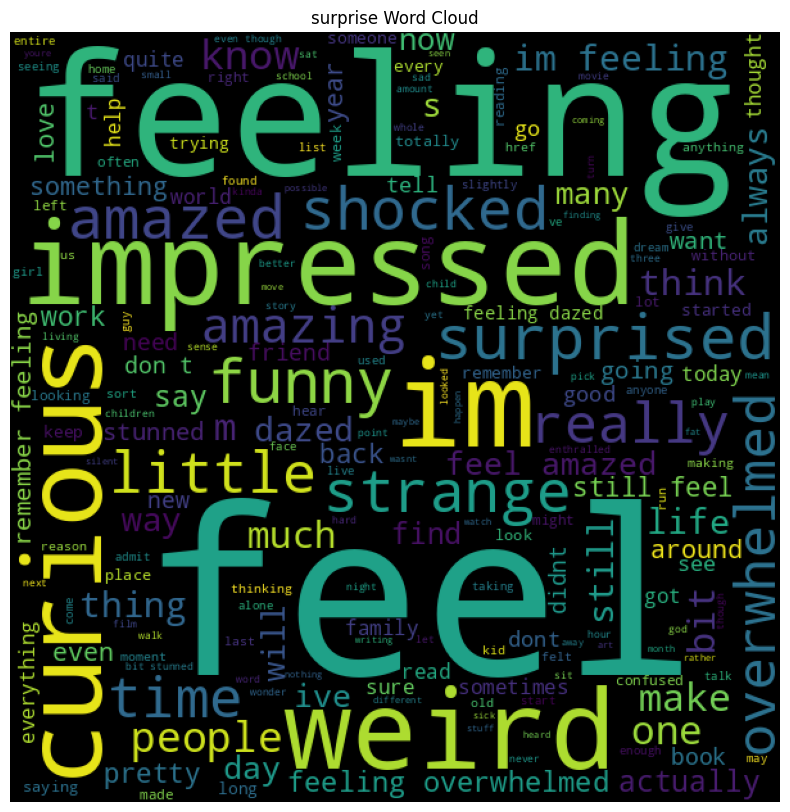

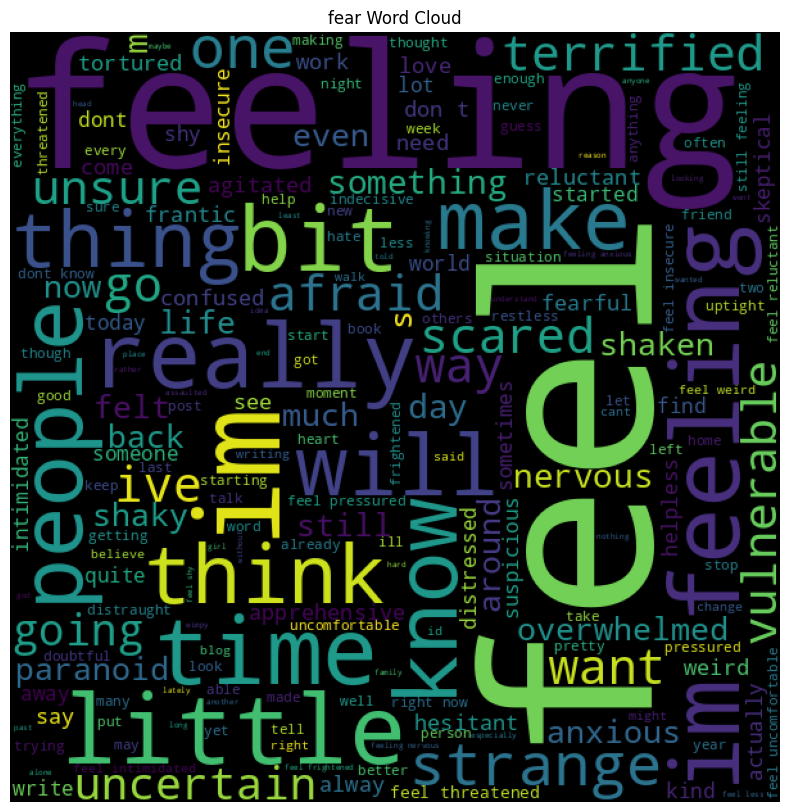

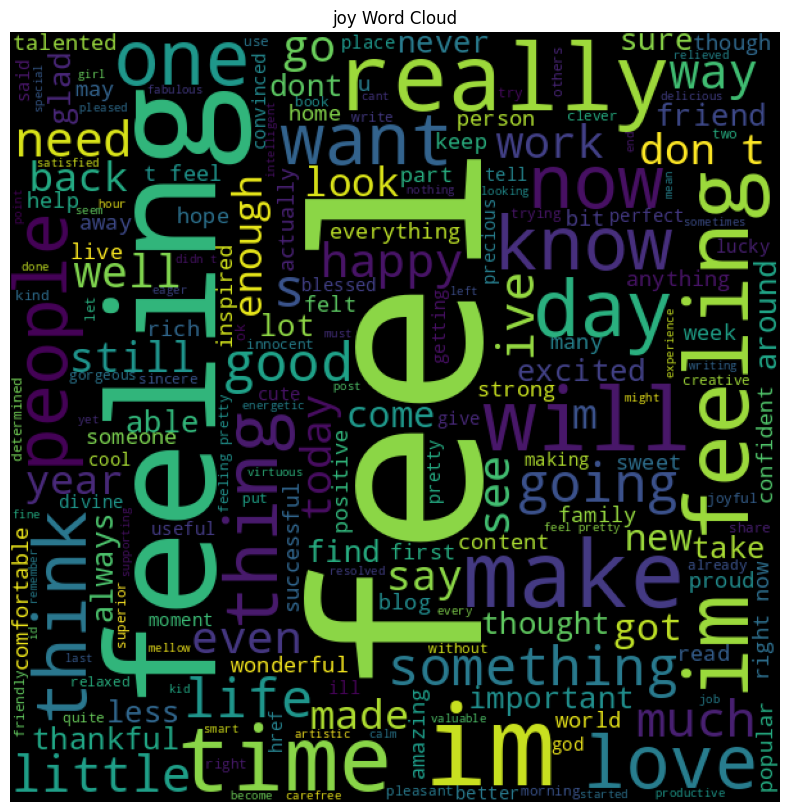

In [11]:
# word cloud for each emotions
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10,10))
    plt.title(emotion+" Word Cloud")
    plt.imshow(wordcloud)
    plt.axis("off")
emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
    text = " ".join([sentence for sentence in train_data.loc[train_data['Emotion']== emotion, 'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

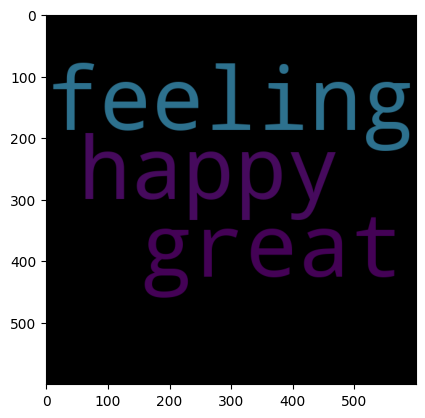

In [12]:
text = " i am feeling great and happy"
wc = WordCloud(width = 600, height = 600).generate(text)
plt.imshow(wc)

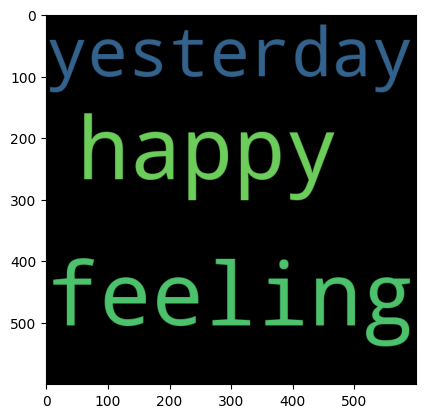

In [13]:
text = " i am feeling happy since yesterday"
wc = WordCloud(width = 600, height = 600).generate(text)
plt.imshow(wc)

In [14]:
#DATA PREPROCESSING
#ENCODE EMOTIONS
lb = LabelEncoder()
train_data['Emotion_Encoded'] = lb.fit_transform(train_data['Emotion'])

In [15]:
train_data

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


**MACHINE LEARNING**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [17]:
df = train_data.copy()
df

,Comment,Emotion,length,Emotion_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [18]:
#Data cleaning and preprocessing
#Download NTLK stopwords 
import nltk
nltk.download('stopwords')  

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)  


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
len(nltk.corpus.stopwords.words('english'))

198

In [20]:
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]"," ", text)
    text = text.lower()
    text = text.split()
    text  = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
clean_text("I am 23456 % greatful loving, hating, hated")
df['cleaned_comment'] = df['Comment'].apply(clean_text)

In [21]:
df

,Comment,Emotion,length,Emotion_Encoded,cleaned_comment
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [22]:
#Train test
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_comment'],df['Emotion_Encoded'], test_size = 0.2, random_state = 42)

In [23]:
X_train

676      refer cours though cant help feel somehow iron...
14180           would feel awkward someon tell feel toward
7077     feel like probabl would like book littl bit si...
13004    ive slow take time listen child moment feel li...
10264                         feel vital rlsh gimmick need
                               ...                        
13418         love leav reader feel confus slightli deceiv
5390                                            feel delic
860                                start feel littl stress
15796      feel accept music critic reinforc concept music
7270             feel someon rude wrongli done someth lose
Name: cleaned_comment, Length: 12799, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


#Vectorization using tfidf
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
    "Support Vector Machine" : SVC()
}

for name, clf in classifiers.items():
    print(f"\n==================== {name} ===============")
    clf.fit(X_train_tfidf , y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))

    


==================== Multinomial Naive Bayes ===============

Accuracy using TF-IDF: 0.6590625
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.32      0.48       439
           1       0.88      0.23      0.37       375
           2       0.58      0.98      0.73      1027
           3       1.00      0.03      0.05       303
           4       0.72      0.91      0.80       950
           5       1.00      0.02      0.04       106

    accuracy                           0.66      3200
   macro avg       0.85      0.42      0.41      3200
weighted avg       0.76      0.66      0.59      3200


==================== Logistic Regression ===============

Accuracy using TF-IDF: 0.825
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       439
           1       0.85      0.72      0.78       375
           2       0.76      0.94      0.84      1027
          

In [26]:
lg  = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
y_pred_lg = lg.predict(X_test_tfidf)
y_pred_lg

array([4, 2, 4, ..., 2, 2, 4])

In [27]:
def prediction(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])
    predicted_label = lg.predict(input_vectorized)[0]
    
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorized)[0])
    
    return predicted_emotion, label

sentences =  ["i didn't feel humiliated",
             "i feel strong and good overall",
             "i am grabbing a minute to post i feel freedy wrong"
             "he was speechless when he found out he was accepted to this new job",
              "This is outrageous, how can you talk like that?"
              "I am feeling grouchy",
              "he hates you",
              "mom is really sweet and caring"
             ]

for sent in sentences:
    print(sent)
    predict_emotion, label  = prediction(sent)
    print("predicted emotion: ", predict_emotion)
    print("predicted label: ",label)
    print("------------------------------------------------")

i didn't feel humiliated
predicted emotion:  sadness
predicted label:  4
------------------------------------------------
i feel strong and good overall
predicted emotion:  joy
predicted label:  2
------------------------------------------------
i am grabbing a minute to post i feel freedy wronghe was speechless when he found out he was accepted to this new job
predicted emotion:  joy
predicted label:  2
------------------------------------------------
This is outrageous, how can you talk like that?I am feeling grouchy
predicted emotion:  anger
predicted label:  0
------------------------------------------------
he hates you
predicted emotion:  anger
predicted label:  0
------------------------------------------------
mom is really sweet and caring
predicted emotion:  love
predicted label:  3
------------------------------------------------


In [28]:
#save files
import pickle
pickle.dump(lg,open("logistic_regression.pkl", 'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl", 'wb'))
    

In [29]:
import sklearn
print(sklearn.__version__)

1.6.1


In [30]:
#APPLYING DEEP LEARNING USING LSTM
#text cleaning, encoding, padding
max([len(w) for w in train_data['Comment']])

300

In [31]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [32]:
def clean_text(df, column,vocab_size, max_len):
    stemmer = PorterStemmer()

    corpus = []
    for text in df[column]:
        text = re.sub("[^a-zA-Z]",' ', text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(w) for w in text if w not in stopwords]
        text = " ".join(text)
        corpus.append(text)
       
                    
    one_hot_word = [one_hot(input_text = word,n = vocab_size) for word in corpus]
    pad = pad_sequences(sequences = one_hot_word , maxlen = max_len, padding = 'pre')
    return pad
x_train = clean_text(train_data,'Comment', vocab_size = 11000, max_len = 300)

In [33]:
x_train

array([[    0,     0,     0, ...,  4576,  5774,  9510],
       [    0,     0,     0, ...,  1185,  8736,  9214],
       [    0,     0,     0, ...,  5774,  7976,  7524],
       ...,
       [    0,     0,     0, ...,  2465, 10755,   378],
       [    0,     0,     0, ...,  8397,   989,  1933],
       [    0,     0,     0, ...,  5774,  7502,  4029]], dtype=int32)

In [34]:
text = " ".join(["i love myself","i hate you","we love ourselves"])
one_hot(input_text = text, n= 100)

[6, 55, 65, 6, 86, 74, 30, 55, 60]

In [35]:
x_train

array([[    0,     0,     0, ...,  4576,  5774,  9510],
       [    0,     0,     0, ...,  1185,  8736,  9214],
       [    0,     0,     0, ...,  5774,  7976,  7524],
       ...,
       [    0,     0,     0, ...,  2465, 10755,   378],
       [    0,     0,     0, ...,  8397,   989,  1933],
       [    0,     0,     0, ...,  5774,  7502,  4029]], dtype=int32)

In [36]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [37]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert string labels to integer labels
le = LabelEncoder()
train_labels_int = le.fit_transform(train_data['Emotion'])

# Now apply one-hot encoding
train_labels_cat = to_categorical(train_labels_int)

# Optional: Check the shape and some output
print(train_labels_cat.shape)
print(train_labels_cat[:5])


(15999, 6)
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [38]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Label encode the string labels
le = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])  # Replace with integer labels

# Step 2: One-hot encode
y_train = to_categorical(train_data['Emotion'])


In [39]:
y_train.shape

(15999, 6)

In [40]:
x_train.shape

(15999, 300)

In [41]:
#Model Building and training
model = Sequential()
model.add(Embedding(input_dim = 11000 , output_dim = 150, input_length = 300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6 , activation ='softmax' ))

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.fit(x_train,y_train, epochs = 5 , batch_size = 64, verbose = 1)

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 182s 709ms/step - accuracy: 0.2866 - loss: 1.7032
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 181s 724ms/step - accuracy: 0.5247 - loss: 1.3387
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 178s 710ms/step - accuracy: 0.7864 - loss: 0.6114
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 183s 731ms/step - accuracy: 0.8921 - loss: 0.3488
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 191s 766ms/step - accuracy: 0.9286 - loss: 0.2196


In [42]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (15999, 300)
y_train shape: (15999, 6)


In [49]:
def pred(sent):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]",' ', sent)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(w) for w in text if w not in stopwords]
    text = " ".join(text)
    corpus.append(text)
       
                    
    one_hot_word = [one_hot(input_text = word,n = 11000) for word in corpus]
    pad = pad_sequences(sequences = one_hot_word , maxlen = 300, padding = 'pre')
    return pad
    
sentences = [
    'I hates mangoes',
    'I feel strong and good overall',
    'He is really sweet and caring'
]
for sent in sentences:
    clean_sent = pred(sent)
    emotion = lb.inverse_transform(np.argmax(model.predict(clean_sent),axis=-1))[0]
    label = np.max(model.predict(clean_sent))
    print(emotion)
    print(label)
    print("=============================")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
0
0.8372753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
2
0.9954358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3
0.8843796


In [51]:
model.save('model_jyothsna.h5')

In [52]:
# Save the LabelEncoder
with open('lb1.pkl', 'wb') as f:
    pickle.dump(lb, f)

# Save vocabulary size and max length
vocab_info = {'vocab_size': 11000, 'max_len': 300}
with open('vocab_info.pkl', 'wb') as f:
    pickle.dump(vocab_info, f)